# OpenGHG for users: accessing and interrogating data

In [1]:
from openghg.objectstore import visualise_store
from openghg.localclient import get_obs_surface
from openghg.processing import search, get_footprint, footprints_data_merge
from openghg.plotting import plot_footprint
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


## Check measurement data available

We can first check what measurements are currently available within the object store for you to view. 

*Note: not all data will be available for all users to view depending on permissions set*

In [2]:
visualise_store()

## Accessing the measurement data

You can access the available measurement data using a set of keywords

In [3]:
site = "bsd" # Site code - BSD is for Bilsdate
species = "co" # Species name - carbon monoxide
inlet = "248m" # Specific inlet height for this site

observations = get_obs_surface(site=site, species=species, inlet=inlet)

BSD co 248m


The `observations` variable contains both the measurement data and the associated metadata for the data source. The metadata can be viewed:

In [4]:
observations.metadata

{'site': 'bsd',
 'instrument': 'picarro5310',
 'sampling_period': '60',
 'inlet': '248m',
 'port': '1',
 'type': 'air',
 'network': 'decc',
 'species': 'co',
 'scale': 'WMO-X2014A',
 'data_type': 'timeseries',
 'data_owner': "Simon O'Doherty",
 'data_owner_email': 's.odoherty@bristol.ac.uk',
 'inlet_height_magl': '248m',
 'comment': 'Cavity ring-down measurements. Output from GCWerks',
 'Conditions of use': 'Ensure that you contact the data owner at the outset of your project.',
 'Source': 'In situ measurements of air',
 'Conventions': 'CF-1.6',
 'File created': '2021-08-12 17:37:05.158919+00:00',
 'Processed by': 'OpenGHG_Cloud',
 'station_longitude': -1.15033,
 'station_latitude': 54.35858,
 'station_long_name': 'Bilsdale, UK',
 'station_height_masl': 380.0}

### Tell `matplotlib` we're plotting within a notebook

In [5]:
%matplotlib inline

The data can be extracted (as an xarray Dataset) and quickly plotted:

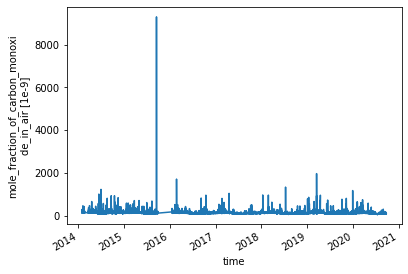

In [6]:
data = observations.data
mol_frac = data.mf
mol_frac.plot()

## Within dates

In [7]:
site = "hfd"
species = "co2"
inlet = "50m"
start_date = "2017-03-01"
end_date = "2017-03-30"

observations = get_obs_surface(site=site, species=species, inlet=inlet, start_date=start_date, end_date=end_date)

HFD co2 50m


In [8]:
observations.data

<xarray.Dataset>
Dimensions:                    (time: 19632)
Coordinates:
  * time                       (time) datetime64[ns] 2017-03-01T00:00:30 ... ...
Data variables:
    mf                         (time) float64 414.3 414.3 414.5 ... 410.2 409.8
    mf_variability             (time) float64 0.097 0.123 0.07 ... 0.313 0.153
    mf_number_of_observations  (time) float64 18.0 19.0 19.0 ... 19.0 19.0 7.0
Attributes: (12/22)
    data_owner:           Simon O'Doherty
    data_owner_email:     s.odoherty@bristol.ac.uk
    inlet_height_magl:    50m
    comment:              Cavity ring-down measurements. Output from GCWerks
    Conditions of use:    Ensure that you contact the data owner at the outse...
    Source:               In situ measurements of air
    ...                   ...
    sampling_period:      60
    inlet:                50m
    port:                 9
    type:                 air
    network:              decc
    scale:                WMO-X2007

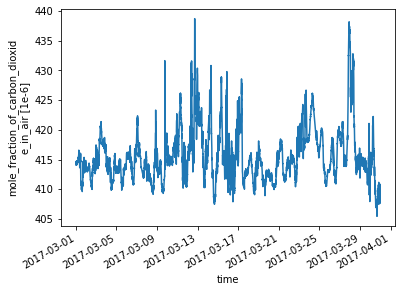

In [9]:
mol_frac = observations.data.mf
mol_frac.plot()

## Less exact searches

Search for all carbon dioxide measurements in the object store

In [10]:
results = search(species="co2", skip_ranking=True)

In [11]:
results

Site: RPB
---------
co2 at 12m


Site: HFD
---------
co2 at 50m, 100m


Site: BSD
---------
co2 at 42m, 248m, 108m


Site: TTA
---------
co2 at 222m


Site: RGL
---------
co2 at 90m, 45m


Site: TAC
---------
co2 at 100m, 185m, 54m


Examine the raw data underneath

In [12]:
print(results.raw())

{'rpb': {'co2': {'12m': {'keys': ['data/uuid/99961e98-51e4-45d5-b155-f491bbfe5076/v1/2016-08-03-20:50:30+00:00_2016-12-31-23:59:30+00:00', 'data/uuid/99961e98-51e4-45d5-b155-f491bbfe5076/v1/2017-01-01-00:00:30+00:00_2017-12-31-23:59:30+00:00', 'data/uuid/99961e98-51e4-45d5-b155-f491bbfe5076/v1/2018-01-01-00:00:30+00:00_2018-12-23-08:25:30+00:00', 'data/uuid/99961e98-51e4-45d5-b155-f491bbfe5076/v1/2019-01-18-10:03:30+00:00_2019-12-31-23:59:30+00:00', 'data/uuid/99961e98-51e4-45d5-b155-f491bbfe5076/v1/2020-01-01-00:00:30+00:00_2020-01-20-09:37:30+00:00'], 'metadata': {'site': 'rpb', 'instrument': 'picarro', 'sampling_period': '60', 'inlet': '12m', 'port': '1', 'type': 'air', 'network': 'agage', 'species': 'co2', 'scale': 'wmo-x2007', 'data_type': 'timeseries'}}}}, 'hfd': {'co2': {'50m': {'keys': ['data/uuid/43924d75-1795-4929-947e-ed9e444f8236/v1/2013-11-20-12:21:30+00:00_2013-12-31-23:39:30+00:00', 'data/uuid/43924d75-1795-4929-947e-ed9e444f8236/v1/2014-01-01-00:12:30+00:00_2014-12-31-2

In [13]:
tac_co2 = results.retrieve(species="co2", site="tac", inlet="185m")
data = tac_data.data
data

NameError: name 'tac_data' is not defined

In [ ]:
mol_frac = data.co2
mol_frac.plot()

In [ ]:
hfd_co2 = results.retrieve(species="co2", site="hfd", inlet="50m")
mol_frac = hfd_co2.data.co2
mol_frac.plot()

### All data from a site

In [ ]:
results = search(site="BSD", skip_ranking=True)

In [ ]:
results

In [ ]:
sf6_data = results.retrieve(species="sf6", site="bsd", inlet="248m")

In [ ]:
mol_frac = sf6_data.data.sf6
mol_frac.plot()

## Comparing to predictions

OpenGHG provides tools which allow calculation of predicted measurements based on emissions sources, where the appropriate data is available.

This is done by aggregrating sensitivity maps (footprints) for a given site and an emissions map covering the same region.

### Retrieve some footprints

Here we retrieve a footprint by itself

In [ ]:
footprint = get_footprint(site="TAC", domain="europe", height="185m", start_date="2021-02-01")

In [ ]:
fp_data = footprint.data
fp_data

### Plot the footprint

We can have a quick look at the footprint using an OpenGHG helper function. We plan to pull the plotting functionality out into an `openghg-plotting` package as packages like cartopy can introduce complicated dependencies of their own.

In [ ]:
plot_footprint(data=fp_data, label="Footprint")

### Merge a footprint and some data together into a single Dataset

For this we use the `footprints_data_merge` function from the `processing` module.

In [ ]:
tac = get_obs_surface(site="TAC", species="ch4", inlet="185m")
tac.data.time.max()

In [ ]:
start_date = "2012-01-01"
end_date = "2013-01-01"

site = "tac" 
height = "100m"
species = "ch4"
domain ="EUROPE"
model = "NAME"
network = "decc"
source = "anthro"

combined_data = footprints_data_merge(site=site, height=height, network=network, domain=domain, 
                                    start_date=start_date, end_date=end_date, species=species,
                                    flux_sources=source, load_flux=True, calc_timeseries=True)
    
data = combined_data.data

Have a quick look at the Dataset

In [ ]:
data

Calculate modelled mole fraction based on emissions estimate and add a sensible baseline

In [ ]:
mf = data.mf
mf_mod = data.mf_mod
baseline = mf.quantile(0.01).drop("quantile")
mf_mod = mf_mod + baseline

print(f"Estimating baseline based on 1st percentile of data: {baseline.values}")

In [ ]:
fig, ax = plt.subplots()

mf.plot(marker="x", ax=ax, label="Measured mole fraction")
mf_mod.plot(marker="o", ax=ax, label="Modelled mole fraction")

ax.legend()

## Viewing emissions data

Any emissions data itself can be viewed through OpenGHG...

**++ADD PLOTS OF EMISSIONS HERE++**

*May have an issue that we want to be able to plot this on a map, in which case we would need a working link to cartopy and proj C library. Need to decide if we want this to be a dependency of openghg or not or perhaps incorporate openghg-plotting library instead*